## 1. 혼자서 해보기

In [160]:
mpg = as.data.frame(ggplot2::mpg)
head(mpg, 3)

manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact


In [161]:
displ_1 = mpg %>% filter(displ <= 4)
displ_2 = mpg %>% filter(displ >= 5)

In [162]:
mean(displ_1$hwy)

[1] 25.96319

In [163]:
mean(displ_2$hwy)

[1] 18.07895

In [164]:
case1 = mpg %>% filter(manufacturer == "audi")
case2 = mpg %>% filter(manufacturer == "toyota")

In [165]:
mean(case1$cty)

[1] 17.61111

In [166]:
mean(case2$cty)

[1] 18.52941

In [167]:
case3 = mpg %>% filter(manufacturer %in% c("chevrolet", "ford", "honda"))
mean(case3$hwy)

[1] 22.50943

## 2. 혼자서 해보기

In [169]:
head(mpg, 3)

manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact


In [171]:
mpg_new = mpg %>% select(class, cty)
head(mpg_new, 3)

class,cty
compact,18
compact,21
compact,20


In [172]:
suv = mpg_new %>% filter(class == "suv")
compact = mpg_new %>% filter(class == 'compact')

In [173]:
mean(suv$cty)

[1] 13.5

In [174]:
mean(compact$cty)

[1] 20.12766

## 3. 혼자서 해보기

In [176]:
mpg %>% filter(manufacturer == "audi") %>% arrange(desc(hwy)) %>% head(5)

manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
audi,a4 quattro,2.0,2008,4,manual(m6),4,20,28,p,compact


## 4. 혼자서 해보기

In [179]:
mpg_copy = mpg
mpg_copy = mpg_copy %>% mutate(total = cty + hwy)
head(mpg_copy, 3)

manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,total
audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,47
audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,50
audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,51


In [180]:
mpg_copy = mpg_copy %>%
            mutate(total_mean = total / 2)
head(mpg_copy, 3)

manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,total,total_mean
audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,47,23.5
audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,50,25.0
audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,51,25.5


In [182]:
mpg_copy %>% arrange(desc(total_mean)) %>% head(3)

manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,total,total_mean
volkswagen,new beetle,1.9,1999,4,manual(m5),f,35,44,d,subcompact,79,39.5
volkswagen,jetta,1.9,1999,4,manual(m5),f,33,44,d,compact,77,38.5
volkswagen,new beetle,1.9,1999,4,auto(l4),f,29,41,d,subcompact,70,35.0


In [183]:
mpg %>%
    mutate(total = cty + hwy, total_mean = total / 2) %>%
    arrange(desc(total_mean)) %>%
    head(3)

manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,total,total_mean
volkswagen,new beetle,1.9,1999,4,manual(m5),f,35,44,d,subcompact,79,39.5
volkswagen,jetta,1.9,1999,4,manual(m5),f,33,44,d,compact,77,38.5
volkswagen,new beetle,1.9,1999,4,auto(l4),f,29,41,d,subcompact,70,35.0


## 5. 혼자서 해보기

In [184]:
mpg %>%
    group_by(class) %>%
    summarise(mean_cty = mean(cty))

class,mean_cty
2seater,15.40000
compact,20.12766
midsize,18.75610
minivan,15.81818
pickup,13.00000
subcompact,20.37143
suv,13.50000


In [185]:
mpg %>%
    group_by(class) %>%
    summarise(mean_cty = mean(cty)) %>%
    arrange(desc(mean_cty))

class,mean_cty
subcompact,20.37143
compact,20.12766
midsize,18.75610
minivan,15.81818
2seater,15.40000
suv,13.50000
pickup,13.00000


In [186]:
mpg %>%
    group_by(manufacturer) %>%
    summarise(mean_hwy = mean(hwy)) %>%
    arrange(desc(mean_hwy)) %>%
    head(3)

manufacturer,mean_hwy
honda,32.55556
volkswagen,29.22222
hyundai,26.85714


In [190]:
mpg %>%
    filter(class == 'compact') %>%
    group_by(manufacturer) %>%
    summarise(n = n()) %>%
    arrange(desc(n))

manufacturer,n
audi,15
volkswagen,14
toyota,12
subaru,4
nissan,2


## 6. 혼자서 해보기

In [191]:
head(mpg, 3)

manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact


In [198]:
fuel = data.frame(fl = c('c', 'd', 'e', 'p', 'r'),
                  price_fl = c(2.35, 2.38, 2.11, 2.76, 2.22),
                  stringsAsFactors = F)
fuel

fl,price_fl
c,2.35
d,2.38
e,2.11
p,2.76
r,2.22


In [199]:
mpg = left_join(mpg, fuel, by = "fl")
head(mpg, 3)

manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,price_fl
audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,2.76
audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,2.76
audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,2.76


In [200]:
mpg %>%
    select(model, fl, price_fl) %>%
    head(5)

model,fl,price_fl
a4,p,2.76
a4,p,2.76
a4,p,2.76
a4,p,2.76
a4,p,2.76


In [202]:
df = read.csv("sales_data_1.csv")
head(df, 5)

X,YM,CATEGORY,ITEM_CNT,QTY,PRICE,MAXTEMP,SALEDAY,RAIN_DAY,HOLIDAY
1,200901,과즙음료,45,990,2611,4,126753,151,12
2,200902,과즙음료,45,1199,2689,9,113399,3014,8
3,200903,과즙음료,43,1102,2735,12,129162,1383,9
4,200904,과즙음료,42,1326,2807,19,126277,3564,8
5,200905,과즙음료,46,1672,2674,25,129584,9288,12


In [204]:
fruit = df %>%
            filter(CATEGORY == '과즙음료')
vitamin = df %>%
            filter(CATEGORY == '비타민음료')
tea = df %>%
        filter(CATEGORY == '차음료')

In [206]:
shapiro.test(fruit$QTY)


	Shapiro-Wilk normality test

data:  fruit$QTY
W = 0.97503, p-value = 0.255


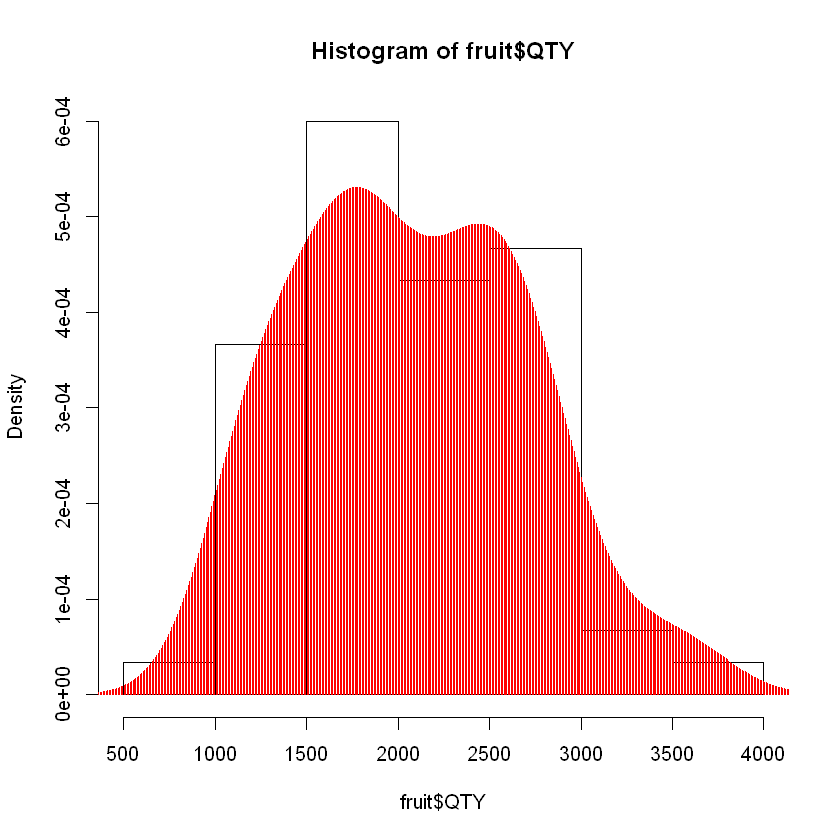

In [211]:
hist(fruit$QTY, probability = T)
lines(density(fruit$QTY), col = 2, type = 'h')


	Shapiro-Wilk normality test

data:  vitamin$QTY
W = 0.95973, p-value = 0.04565


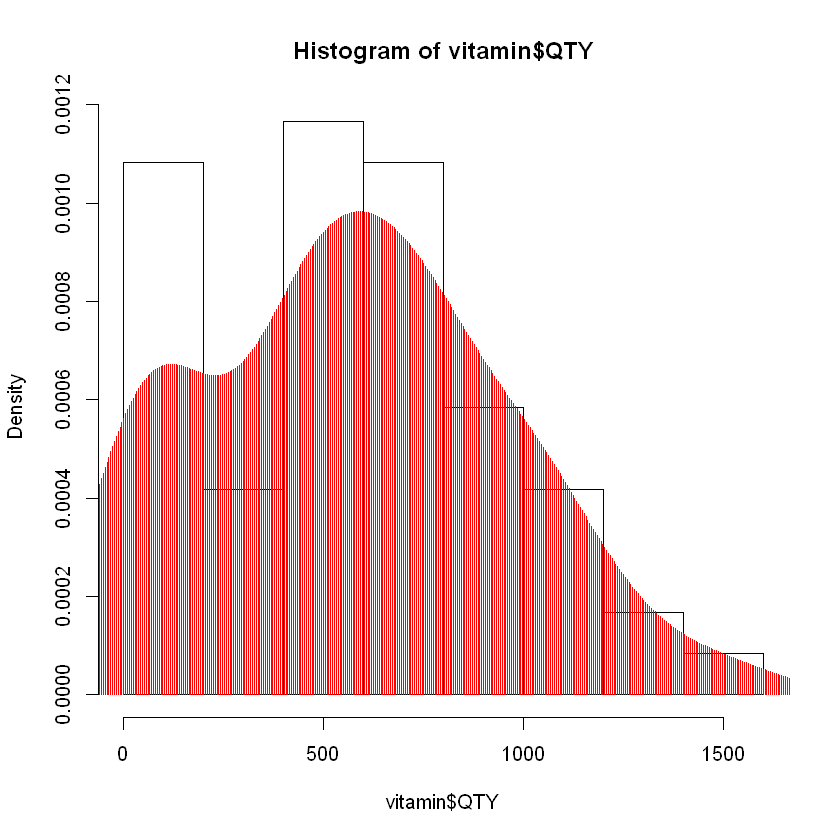

In [213]:
shapiro.test(vitamin$QTY)
hist(vitamin$QTY, probability = T)
lines(density(vitamin$QTY), col = 2, type = 'h')


	Shapiro-Wilk normality test

data:  tea$QTY
W = 0.96497, p-value = 0.0825


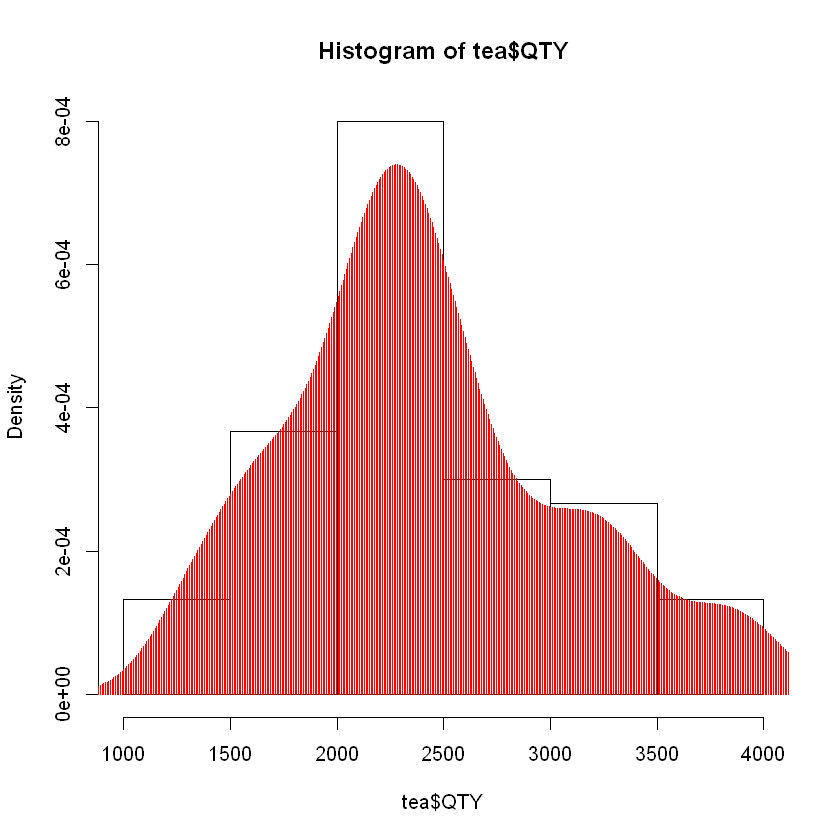

In [214]:
shapiro.test(tea$QTY)
hist(tea$QTY, probability = T)
lines(density(tea$QTY), col = 2, type = 'h')

In [21]:
x = rnorm(100, 175, 10)

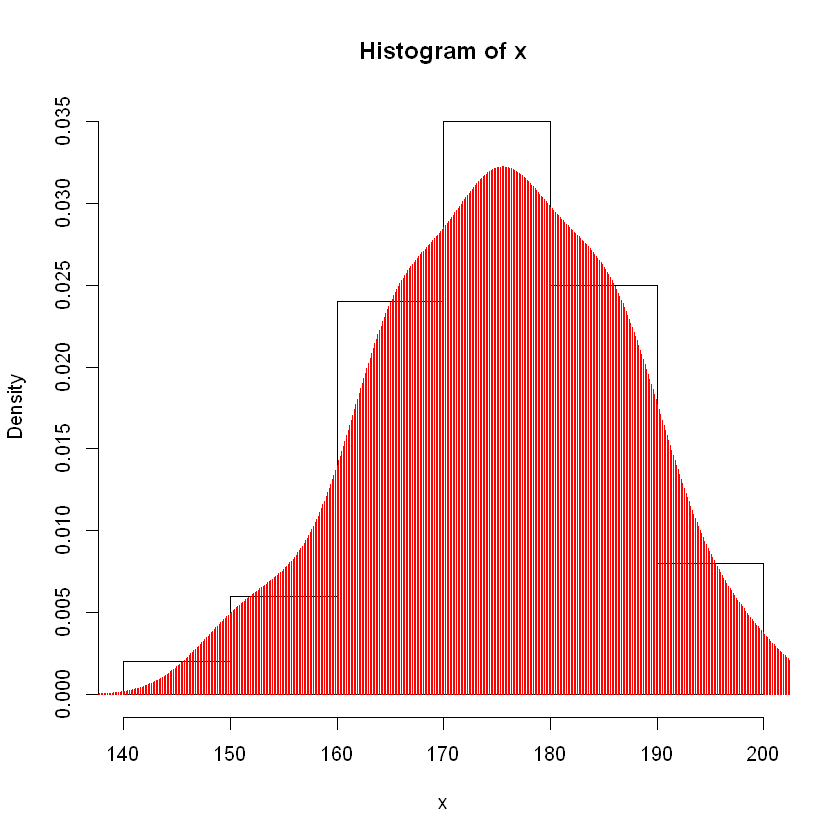

In [30]:
hist(x, breaks = 5, probability = T)
lines(density(x), col = 2, type = 'h')

In [31]:
shapiro.test(x)


	Shapiro-Wilk normality test

data:  x
W = 0.9904, p-value = 0.6966


In [ ]:
a = 1

In [36]:
var1 = c(1, 2, 5, 7, 8)

In [38]:
var1

[1] 1 2 5 7 8

In [37]:
vae = c(1:5)

In [39]:
vae

[1] 1 2 3 4 5

In [40]:
var3 = seq(1, 5)

In [41]:
var3

[1] 1 2 3 4 5

In [42]:
var4 = seq(1, 10, by = 2)

In [43]:
var4

[1] 1 3 5 7 9

In [44]:
var3 + var4

[1]  2  5  8 11 14

In [45]:
var4 +5

[1]  6  8 10 12 14

In [47]:
mean(var3 + var4)

[1] 8

In [51]:
sts = c("a", "b", "c")
sts

[1] "a" "b" "c"

In [52]:
paste(sts, collapse = "-")

[1] "a-b-c"

In [53]:
install.packages('ggplot2')

also installing the dependencies 'desc', 'pkgbuild', 'rprojroot', 'pkgload', 'praise', 'rlang', 'testthat', 'isoband'



package 'desc' successfully unpacked and MD5 sums checked
package 'pkgbuild' successfully unpacked and MD5 sums checked
package 'rprojroot' successfully unpacked and MD5 sums checked
package 'pkgload' successfully unpacked and MD5 sums checked
package 'praise' successfully unpacked and MD5 sums checked
package 'rlang' successfully unpacked and MD5 sums checked
package 'testthat' successfully unpacked and MD5 sums checked
package 'isoband' successfully unpacked and MD5 sums checked
package 'ggplot2' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\14\AppData\Local\Temp\Rtmp0ydHrL\downloaded_packages


In [54]:
library('ggplot2')

Warning message:
"package 'ggplot2' was built under R version 3.6.3"

In [55]:
x = c('a', 'a', 'b', 'c')
x

[1] "a" "a" "b" "c"

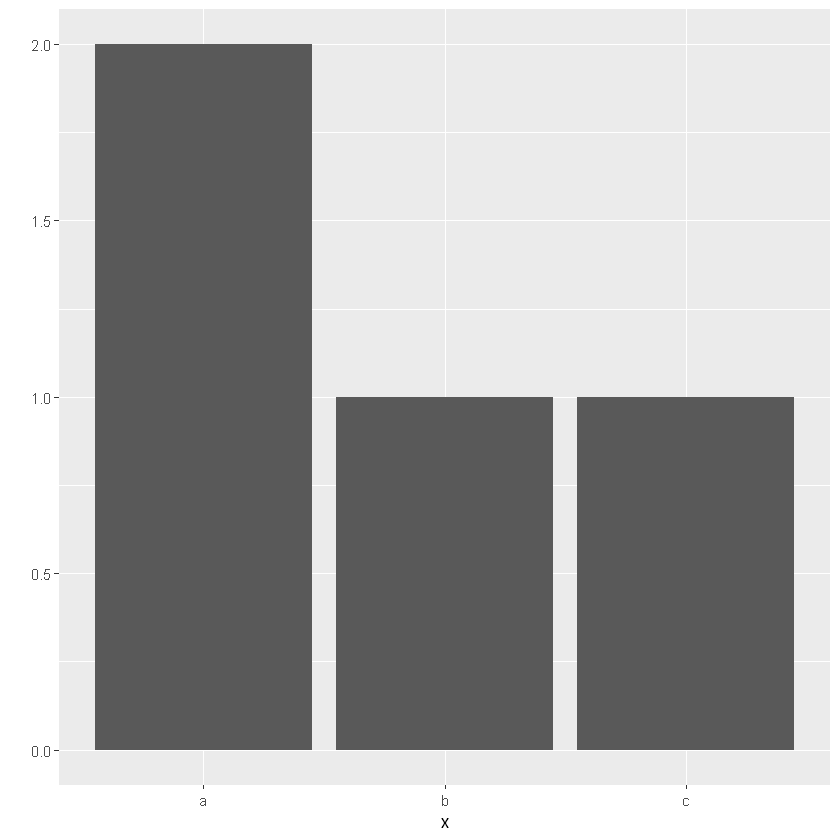

In [56]:
qplot(x)

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


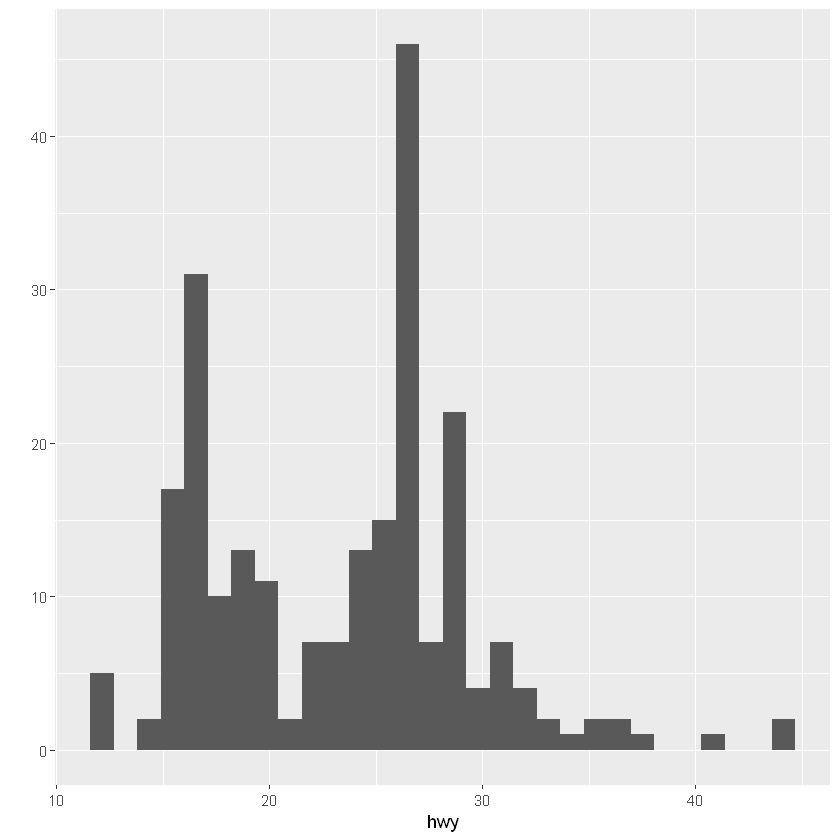

In [57]:
qplot(data = mpg, x = hwy)

In [58]:
student = c(80, 60, 70, 50, 90)
student

[1] 80 60 70 50 90

In [59]:
mean(student)

[1] 70

In [60]:
sd(student)

[1] 15.81139

In [61]:
var(student)

[1] 250

In [69]:
english = c(90, 80, 60, 70)
math = c(50, 60, 100, 20)
class = c(1, 1, 2, 2)

In [70]:
score = data.frame(english, math, class)
score

english,math,class
90,50,1
80,60,1
60,100,2
70,20,2


In [73]:
lr = lm(english ~ math + class, data = score)
summary(lr)


Call:
lm(formula = english ~ math + class, data = score)

Residuals:
      1       2       3       4 
 4.3077 -4.3077  0.5385 -0.5385 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)  
(Intercept) 111.9231    11.1007  10.083   0.0629 .
math         -0.1385     0.1077  -1.286   0.4208  
class       -19.3077     6.1630  -3.133   0.1967  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 6.139 on 1 degrees of freedom
Multiple R-squared:  0.9246,	Adjusted R-squared:  0.7738 
F-statistic: 6.133 on 2 and 1 DF,  p-value: 0.2746


In [79]:
mean(score$english)

[1] 75

In [80]:
install.packages('readxl')

package 'readxl' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\14\AppData\Local\Temp\Rtmp0ydHrL\downloaded_packages


In [81]:
library('readxl')

Warning message:
"package 'readxl' was built under R version 3.6.3"

In [82]:
setwd("c:/R_data")

In [83]:
getwd()

[1] "c:/R_data"

In [84]:
write.csv(score, "score.csv")

In [85]:
score_1 = read.csv("score.csv")
score_1

X,english,math,class
1,90,50,1
2,80,60,1
3,60,100,2
4,70,20,2


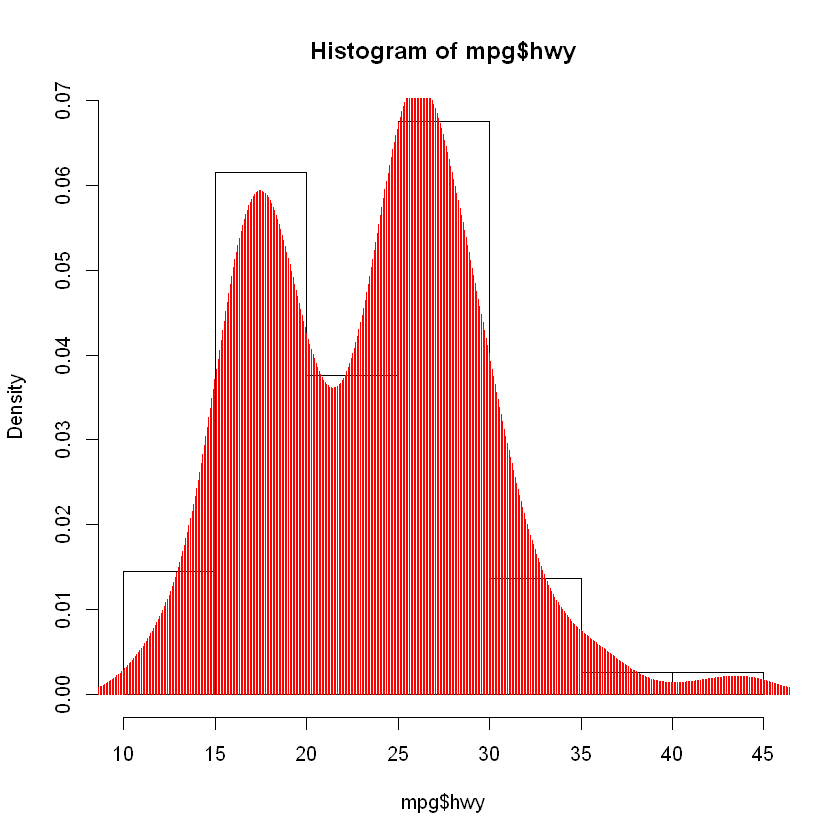

In [91]:
hist(mpg$hwy, probability = T)
lines(density(mpg$hwy), col = 2, type = 'h')

In [92]:
shapiro.test(mpg$hwy)


	Shapiro-Wilk normality test

data:  mpg$hwy
W = 0.95885, p-value = 2.999e-06


In [93]:
exam = read.csv('csv_exam.csv')
exam

id,class,math,english,science
1,1,50,98,50
2,1,60,97,60
3,1,45,86,78
4,1,30,98,58
5,2,25,80,65
6,2,50,89,98
7,2,80,90,45
8,2,90,78,25
9,3,20,98,15
10,3,50,98,45


In [98]:
dim(exam)

[1] 20  5

In [99]:
str(exam)

'data.frame':	20 obs. of  5 variables:
 $ id     : int  1 2 3 4 5 6 7 8 9 10 ...
 $ class  : int  1 1 1 1 2 2 2 2 3 3 ...
 $ math   : int  50 60 45 30 25 50 80 90 20 50 ...
 $ english: int  98 97 86 98 80 89 90 78 98 98 ...
 $ science: int  50 60 78 58 65 98 45 25 15 45 ...


In [100]:
summary(exam)

       id            class        math          english        science     
 Min.   : 1.00   Min.   :1   Min.   :20.00   Min.   :56.0   Min.   :12.00  
 1st Qu.: 5.75   1st Qu.:2   1st Qu.:45.75   1st Qu.:78.0   1st Qu.:45.00  
 Median :10.50   Median :3   Median :54.00   Median :86.5   Median :62.50  
 Mean   :10.50   Mean   :3   Mean   :57.45   Mean   :84.9   Mean   :59.45  
 3rd Qu.:15.25   3rd Qu.:4   3rd Qu.:75.75   3rd Qu.:98.0   3rd Qu.:78.00  
 Max.   :20.00   Max.   :5   Max.   :90.00   Max.   :98.0   Max.   :98.00  

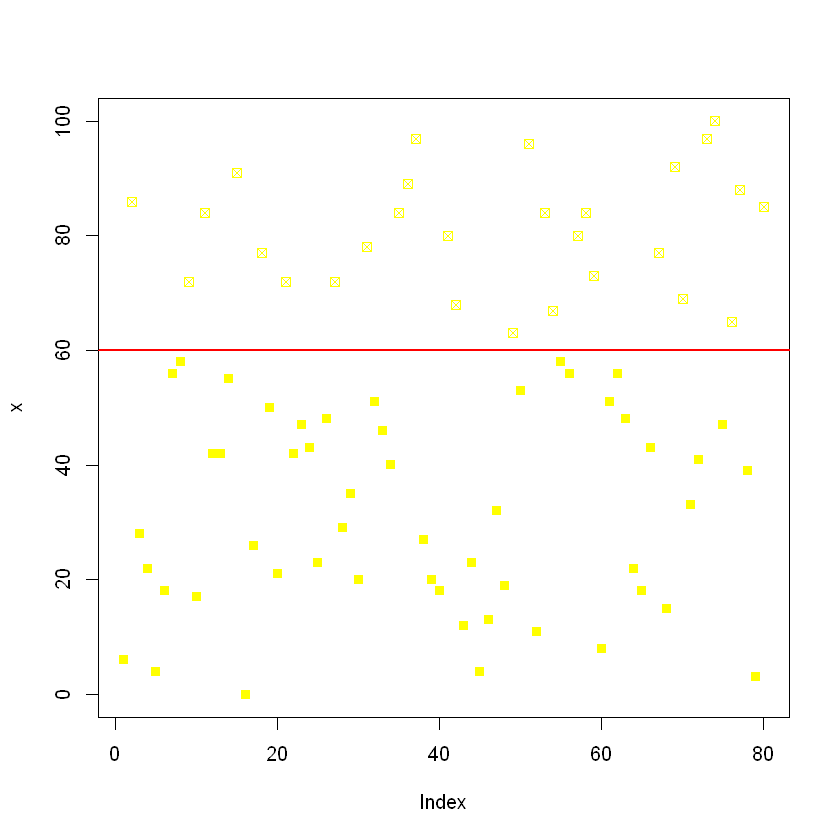

In [117]:
x = sample(0:100, 80, replace = T)
plot(x, pch = ifelse(x>=60, 7, 15), col = ifelse(x>=60, 7, 15))
abline(h = 60, col = 2, lwd = 2)

In [113]:
mpg = as.data.frame(ggplot2::mpg)
head(mpg, 10)

manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
audi,a4,2.8,1999,6,manual(m5),f,18,26,p,compact
audi,a4,3.1,2008,6,auto(av),f,18,27,p,compact
audi,a4 quattro,1.8,1999,4,manual(m5),4,18,26,p,compact
audi,a4 quattro,1.8,1999,4,auto(l5),4,16,25,p,compact
audi,a4 quattro,2.0,2008,4,manual(m6),4,20,28,p,compact


In [118]:
install.packages("dplyr")

also installing the dependencies 'ellipsis', 'pillar', 'glue', 'lifecycle', 'tibble', 'tidyselect', 'vctrs'



package 'ellipsis' successfully unpacked and MD5 sums checked
package 'pillar' successfully unpacked and MD5 sums checked
package 'glue' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'glue'"Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"C:\Users\14\.conda\envs\tf2\Lib\R\library\00LOCK\glue\libs\x64\glue.dll를 C:\Users\14\.conda\envs\tf2\Lib\R\library\glue\libs\x64\glue.dll로 복사하는데 문제가 발생했습니다: Permission denied"Warning message:
"restored 'glue'"

package 'lifecycle' successfully unpacked and MD5 sums checked
package 'tibble' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'tibble'"Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"C:\Users\14\.conda\envs\tf2\Lib\R\library\00LOCK\tibble\libs\x64\tibble.dll를 C:\Users\14\.conda\envs\tf2\Lib\R\library\tibble\libs\x64\tibble.dll로 복사하는데 문제가 발생했습니다: Permission denied"Warning message:
"restored 'tibble'"

package 'tidyselect' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'tidyselect'"Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"C:\Users\14\.conda\envs\tf2\Lib\R\library\00LOCK\tidyselect\libs\x64\tidyselect.dll를 C:\Users\14\.conda\envs\tf2\Lib\R\library\tidyselect\libs\x64\tidyselect.dll로 복사하는데 문제가 발생했습니다: Permission denied"Warning message:
"restored 'tidyselect'"

package 'vctrs' successfully unpacked and MD5 sums checked
package 'dplyr' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'dplyr'"Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"C:\Users\14\.conda\envs\tf2\Lib\R\library\00LOCK\dplyr\libs\x64\dplyr.dll를 C:\Users\14\.conda\envs\tf2\Lib\R\library\dplyr\libs\x64\dplyr.dll로 복사하는데 문제가 발생했습니다: Permission denied"Warning message:
"restored 'dplyr'"


The downloaded binary packages are in
	C:\Users\14\AppData\Local\Temp\Rtmp0ydHrL\downloaded_packages


In [119]:
library("dplyr")


Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



In [120]:
df_raw = data.frame(var1 = c(1, 2, 3),
                    var2 = c(2, 3, 2))
df_raw

var1,var2
1,2
2,3
3,2


In [122]:
df_new = rename(df_raw, v2 = var2)
df_new

var1,v2
1,2
2,3
3,2


In [123]:
head(mpg, 3)

manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact


In [125]:
mpg = rename(mpg, city = cty)
mpg = rename(mpg, highway = hwy)
head(mpg, 3)

manufacturer,model,displ,year,cyl,trans,drv,city,highway,fl,class
audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact


In [126]:
write.csv(mpg, "mpg.csv")

In [127]:
df = data.frame(var1 = c(4, 3, 8),
                var2 = c(2, 6, 1))
df

var1,var2
4,2
3,6
8,1


In [128]:
df$var_sum = df$var1 + df$var2
df

var1,var2,var_sum
4,2,6
3,6,9
8,1,9


In [130]:
midwest = as.data.frame(ggplot2::midwest)
head(midwest, 3)

PID,county,state,area,poptotal,popdensity,popwhite,popblack,popamerindian,popasian,...,percollege,percprof,poppovertyknown,percpovertyknown,percbelowpoverty,percchildbelowpovert,percadultpoverty,percelderlypoverty,inmetro,category
561,ADAMS,IL,0.052,66090,1270.9615,63917,1702,98,249,...,19.63139,4.355859,63628,96.27478,13.15144,18.01172,11.00978,12.44381,0,AAR
562,ALEXANDER,IL,0.014,10626,759.0000,7054,3496,19,48,...,11.24331,2.870315,10529,99.08714,32.24428,45.82651,27.38565,25.22898,0,LHR
563,BOND,IL,0.022,14991,681.4091,14477,429,35,16,...,17.03382,4.488572,14235,94.95697,12.06884,14.03606,10.85209,12.69741,0,AAR


In [132]:
midwest = rename(midwest, total = poptotal)
midwest = rename(midwest, asian = popasian)
head(midwest, 3)

PID,county,state,area,total,popdensity,popwhite,popblack,popamerindian,asian,...,percollege,percprof,poppovertyknown,percpovertyknown,percbelowpoverty,percchildbelowpovert,percadultpoverty,percelderlypoverty,inmetro,category
561,ADAMS,IL,0.052,66090,1270.9615,63917,1702,98,249,...,19.63139,4.355859,63628,96.27478,13.15144,18.01172,11.00978,12.44381,0,AAR
562,ALEXANDER,IL,0.014,10626,759.0000,7054,3496,19,48,...,11.24331,2.870315,10529,99.08714,32.24428,45.82651,27.38565,25.22898,0,LHR
563,BOND,IL,0.022,14991,681.4091,14477,429,35,16,...,17.03382,4.488572,14235,94.95697,12.06884,14.03606,10.85209,12.69741,0,AAR


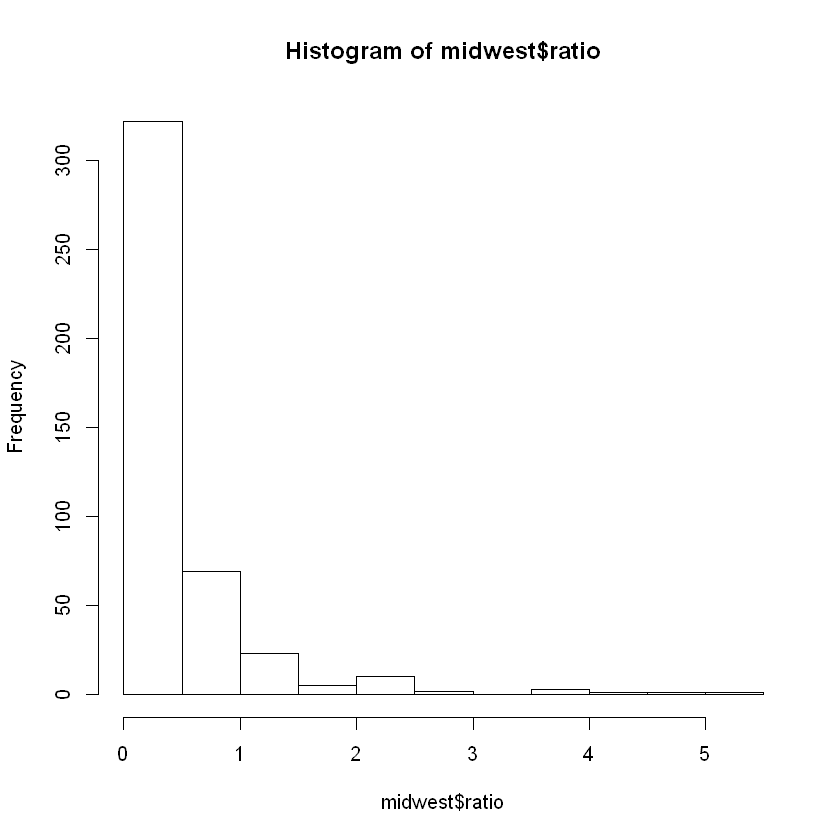

In [133]:
midwest$ratio = midwest$asian / midwest$total * 100
hist(midwest$ratio)

In [134]:
mean(midwest$ratio)

[1] 0.4872462

In [135]:
midwest$group = ifelse(midwest$ratio > 0.4872462, 'large', 'small')

In [136]:
table(midwest$group)


large small 
  119   318 

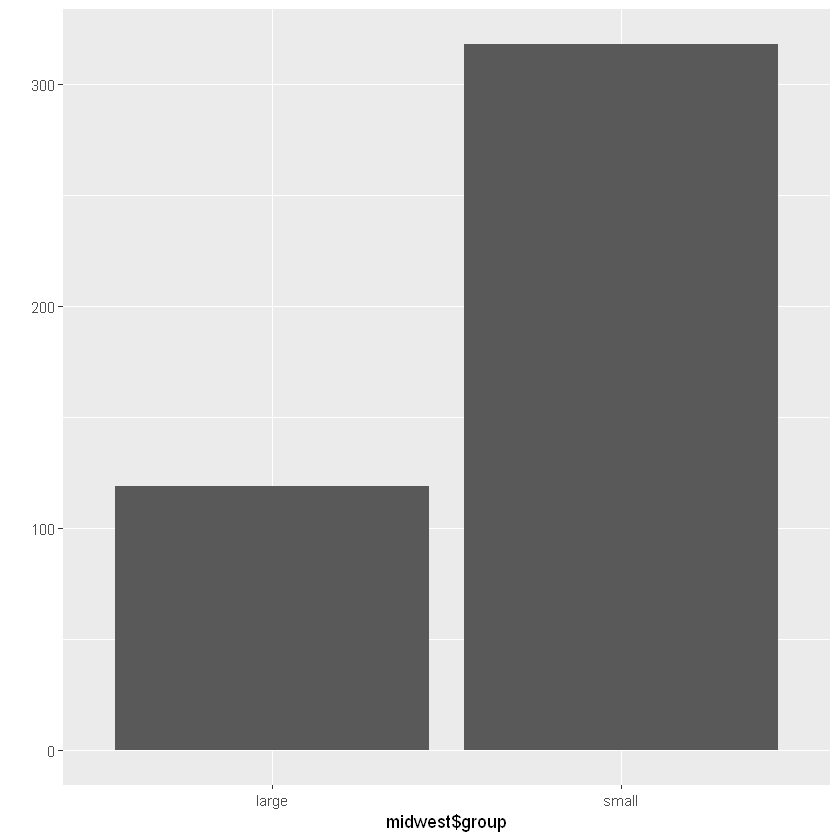

In [137]:
qplot(midwest$group)

In [138]:
exam = read.csv("csv_exam.csv")
head(exam, 3)

id,class,math,english,science
1,1,50,98,50
2,1,60,97,60
3,1,45,86,78


In [140]:
class1 = exam %>% filter(class ==1)
class1

id,class,math,english,science
1,1,50,98,50
2,1,60,97,60
3,1,45,86,78
4,1,30,98,58


In [141]:
exam %>% filter(class != 1)

id,class,math,english,science
5,2,25,80,65
6,2,50,89,98
7,2,80,90,45
8,2,90,78,25
9,3,20,98,15
10,3,50,98,45
11,3,65,65,65
12,3,45,85,32
13,4,46,98,65
14,4,48,87,12


In [142]:
exam %>% filter(class %in% c(1, 3, 5))

id,class,math,english,science
1,1,50,98,50
2,1,60,97,60
3,1,45,86,78
4,1,30,98,58
9,3,20,98,15
10,3,50,98,45
11,3,65,65,65
12,3,45,85,32
17,5,65,68,98
18,5,80,78,90


In [143]:
exam %>%
    group_by(class) %>%
    summarise(mean_math = mean(math))

class,mean_math
1,46.25
2,61.25
3,45.00
4,56.75
5,78.00


In [144]:
head(mpg, 3)

manufacturer,model,displ,year,cyl,trans,drv,city,highway,fl,class
audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact


In [157]:
df = read.csv("sales_data.csv")
head(df)

YM,CATEGORY,ITEM_CNT,QTY,PRICE,MAXTEMP,SALEDAY,RAIN_DAY,HOLIDAY
200901,건강음료,37,1410,1543,4,126753,151,12
200902,건강음료,37,1209,1543,9,113399,3014,8
200903,건강음료,38,1348,1547,12,129162,1383,9
200904,건강음료,38,1377,1500,19,126277,3564,8
200905,건강음료,40,1406,1528,25,129584,9288,12
200906,건강음료,39,1343,1623,27,123218,9998,8


In [158]:
df = df %>% filter(CATEGORY == "과즙음료" | CATEGORY == "비타민음료" | CATEGORY == "차음료")
df

YM,CATEGORY,ITEM_CNT,QTY,PRICE,MAXTEMP,SALEDAY,RAIN_DAY,HOLIDAY
200901,과즙음료,45,990,2611,4,126753,151,12
200902,과즙음료,45,1199,2689,9,113399,3014,8
200903,과즙음료,43,1102,2735,12,129162,1383,9
200904,과즙음료,42,1326,2807,19,126277,3564,8
200905,과즙음료,46,1672,2674,25,129584,9288,12
200906,과즙음료,48,1875,2777,27,123218,9998,8
200907,과즙음료,53,1663,2858,28,131083,17405,8
200908,과즙음료,52,1957,2886,29,130040,7704,10
200909,과즙음료,54,2021,2838,27,131989,4096,8
200910,과즙음료,56,1718,2879,22,136095,2824,10


In [159]:
write.csv(df, "sales_data_1.csv")